In [1]:
%matplotlib inline
import xarray as xr
import numpy as np 
import glob 
import os 
import pyarrow as pa 
from tdigest import TDigest
import matplotlib
import matplotlib.pyplot as plt
from multiprocessing import Pool

#os.chdir
## include your data here (eg. gsv data, nextGEMS, must be on lat lon grid) ## 
#filePathData = "/esarchive/scratch/alacima/projects/destination_earth/icon/*.nc"
#fileList = glob.glob(filePathData) 
#fileList.sort() 

os.chdir('/home/b/b382291/git/AQUA') # CHANGE TO CORRECT PATH OR REMOVE IF USING OTHER DATA 
#imported_module = importlib.import_module("aqua")
from aqua import Reader
from aqua.reader import catalogue

In [2]:
#reader = Reader(model="IFS", exp="tco2559-ng5", source="ICMGG_atm2d", regrid="r010")
reader = Reader(model="ICON", exp="ngc2009", source="atm_2d_ml_R02B09", regrid="r020")
data = reader.retrieve(fix=False, streaming = True, stream_step = 1000)
#data = reader.retrieve(fix=False)
data = reader.regrid(data)

In [2]:
# creating the data set 
# data = xr.open_dataset(fileList[0]) # open dataset
# uas = np.squeeze(data.uas)
# vas = np.squeeze(data.vas)
# u = np.sqrt(np.square(vas[:,100:200,100:200]) + np.square(uas[:,100:200,100:200])) # selecting random part of the world 
# u_all = u

# for x in range(1, np.size(fileList)):
#     data = xr.open_dataset(fileList[x]) # open dataset
#     uas = np.squeeze(data.uas)
#     vas = np.squeeze(data.vas)
#     u = np.sqrt(np.square(vas[:,100:200,100:200]) + np.square(uas[:,100:200,100:200])) # selecting random part of the world 
#     u_all = xr.concat([u_all, u], "time")

# file_path = "/home/bsc32/bsc32263/git/one_pass/tests/u_speed_10months.nc"
# u_all.to_netcdf(file_path, mode = 'w')


In [2]:
#file_path_data = "/home/bsc32/bsc32263/git/one_pass/tests/uas_10_months.nc"
file_path_levante = "/home/b/b382291/git/one_pass/tests/uas_10_months.nc"
#file_path_data = "/home/bsc32/bsc32263/git/one_pass/tests/u_speed_10months.nc"
#file_path_data = os.path.realpath(os.path.join(os.path.dirname(__file__), 'tests', 'uas_10_months.nc'))

fileList = glob.glob(file_path_levante) 
fileList.sort() 
data = xr.open_dataset(fileList[0])  
data = data.astype(np.float64)

In [3]:
uas = data.uas

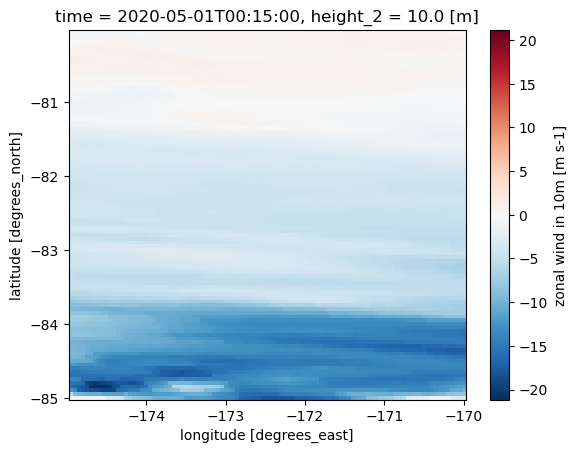

In [4]:
u_2d = uas[0,:,:]

u_2d.plot()

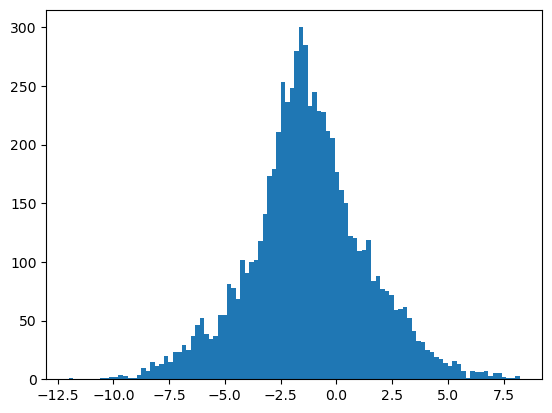

In [5]:
# looking at 1 lat lon point 
u_point = uas[:, 50,50]

plt.hist(u_point, bins = 100)
plt.show()


In [11]:
u_point[0].values

array(-4.67134953)

In [12]:
digest = TDigest() 
for x in range(np.size(u_point)):
    #print(u_point[x])
    digest.update(u_point[x].values)

In [13]:
digest.percentile(50)

-1.3694458763310935

In [14]:
np.percentile(u_point, 50)

-1.3686416745185852

In [15]:
u_dict = digest.to_dict()

In [16]:
u_cent = u_dict['centroids']
u_cent


[{'m': -11.995685577392578, 'c': 1.0},
 {'m': -10.46721076965332, 'c': 1.0},
 {'m': -10.322938919067383, 'c': 1.0},
 {'m': -10.06306266784668, 'c': 1.0},
 {'m': -10.041716575622559, 'c': 1.0},
 {'m': -9.873733520507812, 'c': 1.0},
 {'m': -9.777172088623047, 'c': 1.0},
 {'m': -9.695204734802246, 'c': 1.0},
 {'m': -9.607586860656738, 'c': 1.0},
 {'m': -9.592874526977539, 'c': 1.0},
 {'m': -9.578265190124512, 'c': 1.0},
 {'m': -9.55584716796875, 'c': 1.0},
 {'m': -9.521180152893066, 'c': 1.0},
 {'m': -9.373201370239258, 'c': 1.0},
 {'m': -9.195128440856934, 'c': 1.0},
 {'m': -9.162080764770508, 'c': 1.0},
 {'m': -8.936981201171875, 'c': 1.0},
 {'m': -8.928110122680664, 'c': 1.0},
 {'m': -8.864360809326172, 'c': 1.0},
 {'m': -8.762628555297852, 'c': 1.0},
 {'m': -8.756973266601562, 'c': 1.0},
 {'m': -8.747735977172852, 'c': 1.0},
 {'m': -8.730213165283203, 'c': 1.0},
 {'m': -8.67375659942627, 'c': 1.0},
 {'m': -8.643440246582031, 'c': 1.0},
 {'m': -8.619156837463379, 'c': 1.0},
 {'m': -8.6

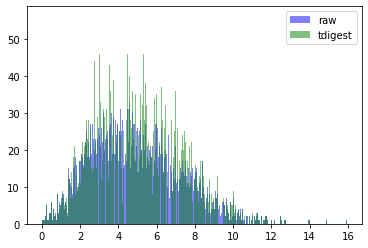

In [47]:
# looking at 1 lat lon point 
u_point = u_all[:, 50,50]

m_values = [x['m'] for x in u_cent]
c_values = [x['c'] for x in u_cent]

#plt.hist(m_values, m_values, weights=c_values)
plt.hist(u_point, bins = 723, alpha = 0.5, color = 'blue', label = 'raw')

plt.hist(m_values, np.size(m_values), weights = c_values, alpha = 0.5, color = 'green', label='tdigest')

#plt.bar(m_values, c_values, color = 'green', label='tdigest')

plt.legend(loc='upper right')
plt.show()

In [30]:
u_point[x].values

array(-0.41833296)

In [42]:
# going to calculate the accuracy of the t-digest against numpy.percentile 
# calculating as a percentage difference between the two sets 


# BECAUSE THE VALUES ARE CENTERED AROUND 0, ARTIFICALLY ADDING 100 TO THE DATASET TO RECENTER 
lat_len = 51
perc_len = 101

per_dif = np.zeros([perc_len, lat_len])
per_change = np.zeros([perc_len, lat_len])
dif = np.zeros([perc_len, lat_len])

for y in range(0, lat_len):
    # looping through latitude 
    u_point = uas[:, y, 50] + 100 # fixing longitude (time, lat, lon)

    digest = TDigest() 

    # generating t-digest 
    for xt in range(np.size(u_point)):
        #print(u_point[x])
        digest.update(u_point[xt].values) # this is a single value 

    # comparing t-digest against np.perctile for every percentile 0 - 100 
    for x in range(0, perc_len):
        np_per = np.percentile(u_point, x)
        tdig_per = digest.percentile(x)
        diff = np.abs(np_per - tdig_per)
        av = np.mean([np_per,tdig_per])

        per_dif[x, y] = abs(diff/av)
        per_change[x, y] = abs(diff/np_per)
        dif[x, y] = diff

per_dif = per_dif*100
per_change = per_change*100


<function matplotlib.pyplot.show(*args, **kw)>

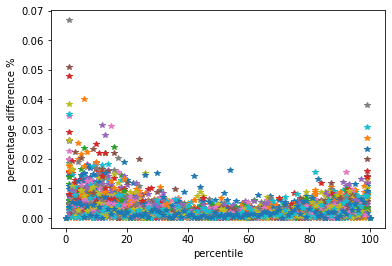

In [46]:
percentile_lin = np.linspace(0, 100, perc_len)

for y in range(0, lat_len):
    plt.plot(percentile_lin, dif[:,y], "*")
plt.ylabel("absolute difference")
plt.xlabel("percentile")
plt.show


0.050894085752745184

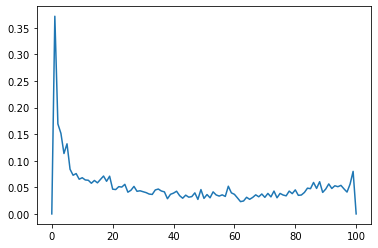

In [7]:
# averaging the percentile differences for each percentile 
av_per_dif_lin = np.mean(per_dif, axis = 1)

plt.plot(percentile_lin, av_per_dif_lin)

np.mean(av_per_dif_lin) # we have an average error of 0.05 % - what is our expected tolerance ?


In [89]:
## understanding the compression parameter 


digest_changeK = TDigest(delta=100, K=25) 


#digest.update(u_point[xt].values) # this is a single value 


0.6642585575580597

## now want to look at the py-arrow implementation 

In [63]:

#for x in range(np.size(u_point)):

pa.compute.tdigest(u_point.values, q = 0.5, delta=1000, buffer_size=500)

#pa.compute.TDigestOptions.serialize(arrow_digest)
#pa.compute.TDigestOptions.__init__()
#for x in range(np.size(u_point)):
#    pa.compute.tdigest(u_point[x].values, q = 0.5, delta=1000, buffer_size=500)

[
  -1.3695870821165574
]

In [54]:
digest.percentile(50)

-1.3694458763310935

In [62]:
u_point.quantile(.5)

<xarray.DataArray 'uas' ()>
array(-1.36864167)
Coordinates:
    quantile  float64 0.5

In [68]:
n = 100
dictlist = [dict() for x in range(n)]

In [3]:

u_2d_big = data.uas[0,:,:]

Looking at putting python t-digest into a parallel loop - why does this take 2 seconds? 

In [6]:
 
# function for building t-digests 
def task_tdigest(dictlist, data, index):
    
    digest = TDigest() 
    digest.update(data) # this is a single value 
    dictlist[index] = digest
    
    return dictlist

data_set = u_2d_big
u_1d = np.resize(data_set, np.size(data_set))
n = np.size(u_1d)
dictlist = [dict() for x in range(n)]    

if __name__ == '__main__':
    with Pool() as pool:
        # prepare arguments
        items = [(dictlist[i], u_1d[i], i) for i in range(n)]
        # call the same function with different data in parallel
        dictlistnew = pool.starmap(task_tdigest, items)

and the non-parallel version take 0.2 ? 

In [5]:
def task_tdigest(dictlist, data, index):
    
    digest = TDigest() 
    digest.update(data) # this is a single value 
    dictlist[index] = digest
    
    return dictlist
 
data_set = u_2d_big
u_1d = np.resize(data_set, np.size(data_set))
n = np.size(u_1d)
dictlist = [dict() for x in range(n)]    

for i in range(n):
    # call the same function with different data in parallel
    task_tdigest(dictlist[i],u_1d[i], i)


In [53]:
dictlist

[{0: <T-Digest: n=1, centroids=1>},
 {1: <T-Digest: n=1, centroids=1>},
 {2: <T-Digest: n=1, centroids=1>},
 {3: <T-Digest: n=1, centroids=1>},
 {4: <T-Digest: n=1, centroids=1>},
 {5: <T-Digest: n=1, centroids=1>},
 {6: <T-Digest: n=1, centroids=1>},
 {7: <T-Digest: n=1, centroids=1>},
 {8: <T-Digest: n=1, centroids=1>},
 {9: <T-Digest: n=1, centroids=1>},
 {10: <T-Digest: n=1, centroids=1>},
 {11: <T-Digest: n=1, centroids=1>},
 {12: <T-Digest: n=1, centroids=1>},
 {13: <T-Digest: n=1, centroids=1>},
 {14: <T-Digest: n=1, centroids=1>},
 {15: <T-Digest: n=1, centroids=1>},
 {16: <T-Digest: n=1, centroids=1>},
 {17: <T-Digest: n=1, centroids=1>},
 {18: <T-Digest: n=1, centroids=1>},
 {19: <T-Digest: n=1, centroids=1>},
 {20: <T-Digest: n=1, centroids=1>},
 {21: <T-Digest: n=1, centroids=1>},
 {22: <T-Digest: n=1, centroids=1>},
 {23: <T-Digest: n=1, centroids=1>},
 {24: <T-Digest: n=1, centroids=1>},
 {25: <T-Digest: n=1, centroids=1>},
 {26: <T-Digest: n=1, centroids=1>},
 {27: <T-Di

## looking at the python bindings to the pyarrow package

In [7]:
import pyarrow as pa
import numpy as np
from pyarrow.cffi import ffi
import polars 
import ldbpy, time 
import pyarrow.compute as pac

# c_schema = ffi.new("struct ArrowSchema*")
# schema_ptr = int(ffi.cast("uintptr_t", c_schema))
# c_array = ffi.new("struct ArrowArray*")
# array_ptr = int(ffi.cast("uintptr_t", c_array))
# lineitem = polars.read_parquet("demo-tpch/lineitem.parquet")
# arr = lineitem.to_arrow()["l_tax"].combine_chunks()
# arr._export_to_c(array_ptr, schema_ptr)

a = ldbpy.NTDigest(20,100,10000)
start = time.time()
a.batch_add_arrow([array_ptr] * 20, [schema_ptr] * 20)
print(a.quantile(0, 0.5))
print(a.quantile(1, 0.1))
print(time.time() - start)
start = time.time()
print(pac.tdigest(arr, 0.5))
print(time.time() - start)

FileNotFoundError: No such file or directory: demo-tpch/lineitem.parquet